# MSDS 610 — Final Project 1
### Eddie Flores

---
## `Part One` — Pick you scenario
### Scenario 2 – Used Cars

You just got a job working for a pre-
owned car company in Albuquerque,
New Mexico that buys and sells vehicles
in the area. You’ve been tasked with
determining the asking sells price of a
used vehicle based on it’s
characteristics.

---
## `Part Two` — Split and store your data

**Explanation:**
- Load the vehicles.csv file into a Pandas DataFrame.
- Use .sample(n=100, random_state=42) to randomly select 100 rows.
- Save the sampled rows to live_data.csv.
- Remove the sampled rows from the original DataFrame.
- Save the remaining data to vehicles database for further use.

#### Load and split data into dataframes

In [76]:
#Importing required packages 

import pandas as pd

In [78]:
df = pd.read_csv('vehicles.csv', index_col='id')

In [79]:
# Randomly select 100 rows
sampled_df = df.sample(n=100, random_state=42)

In [80]:
# Save the selected rows to a new CSV file
sampled_df.to_csv("live_data.csv", index=False)

In [81]:
# Remove the selected rows from the original dataframe
df_remaining = df.drop(sampled_df.index)

#### Connect to database

In [37]:
# Loading db package
from sqlalchemy import create_engine

In [39]:
df.shape

(426880, 25)

In [41]:
host = r'127.0.0.1'
db = r'MSDS610'
user = r'postgres'
pw = r'Pa55w0rd'
port = r'5432'
schema = r'raw'

In [43]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [47]:
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,sales_transaction


#### Load database

In [49]:
table_name = r'vehicles'

In [51]:
df_remaining.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

426780

In [57]:
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,sales_transaction
1,vehicles


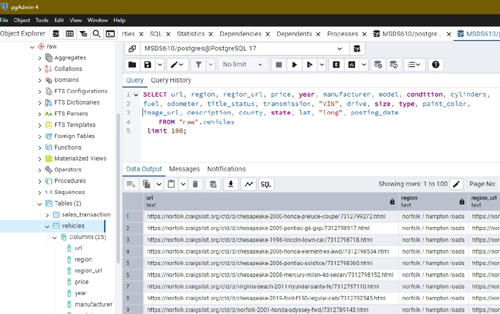

---
## `Part Three` — Data definition and analytical question

### **Data Definition**
This dataset consists of vehicle listings from Craigslist, containing details about cars, their attributes, pricing, and locations.

| **Field Name**  | **Description**                                               | **Data Type**       |
|:---------------|:--------------------------------------------------------------|:--------------------|
| `url`         | URL of the vehicle listing                                      | Nominal (Categorical) |
| `region`      | Name of the geographic region                                  | Nominal (Categorical) |
| `region_url`  | URL of the region’s Craigslist page                           | Nominal (Categorical) |
| `price`       | Listed price of the vehicle                                   | Continuous (Numerical) |
| `year`        | Manufacturing year of the vehicle                            | Continuous (Numerical) |
| `manufacturer`| Name of the vehicle manufacturer (e.g., Ford, BMW)            | Nominal (Categorical) |
| `model`       | Specific model of the vehicle                                | Nominal (Categorical) |
| `condition`   | Condition of the vehicle (e.g., new, good, fair)             | Ordinal (Categorical) |
| `cylinders`   | Number of engine cylinders (e.g., 4 cylinders, 6 cylinders)  | Nominal (Categorical) |
| `fuel`        | Type of fuel used (e.g., gas, diesel, electric)              | Nominal (Categorical) |
| `odometer`    | Vehicle mileage (miles driven)                               | Continuous (Numerical) |
| `title_status`| Title status (e.g., clean, rebuilt, salvage)                 | Nominal (Categorical) |
| `transmission`| Transmission type (e.g., automatic, manual)                 | Nominal (Categorical) |
| `VIN`         | Vehicle Identification Number                                | Nominal (Categorical) |
| `drive`       | Drive type (e.g., 4WD, FWD, RWD)                             | Nominal (Categorical) |
| `size`        | Vehicle size category (e.g., compact, full-size)             | Nominal (Categorical) |
| `type`        | Vehicle type (e.g., sedan, SUV, truck)                       | Nominal (Categorical) |
| `paint_color` | Exterior color of the vehicle                               | Nominal (Categorical) |
| `image_url`   | URL of the vehicle's image                                  | Nominal (Categorical) |
| `description` | Text description of the vehicle                             | Nominal (Categorical) |
| `county`      | County of the vehicle listing (not populated)               | Nominal (Categorical) |
| `state`       | US state where the vehicle is listed                        | Nominal (Categorical) |
| `lat`         | Latitude coordinate of the listing                          | Continuous (Numerical) |
| `long`        | Longitude coordinate of the listing                         | Continuous (Numerical) |
| `posting_date`| Date and time the listing was posted                        | Nominal (Categorical) |

### **Analytical Question**
*"How do different factors such as vehicle condition, mileage, fuel type, and manufacturer impact the listed price of vehicles in Craigslist listings?"*

- **Target Variable:** `price`
- **Independent Variables:** `year`, `condition`, `odometer`, `manufacturer`, `fuel`, `title_status`, `transmission`, `drive`, `type`, and `paint_color`.


---
## `Part Four` — Data prep and feature selection



## **Feature Selection**

In our analysis, we aim to determine how different factors such as vehicle condition, mileage, fuel type, and manufacturer impact the listed price of vehicles on Craigslist. To ensure a focused and relevant analysis, we have selected only the features that directly contribute to this question while removing those that are unrelated or redundant.

### **Selected Features**
- **`price`** *(Target Variable)*: The dependent variable representing the listed price of the vehicle.
- **`year`** *(Continuous Variable)*: Older vehicles tend to have lower prices, making this an essential factor.
- **`condition`** *(Ordinal Variable)*: Vehicle condition (e.g., new, good, fair) directly impacts price.
- **`odometer`** *(Continuous Variable)*: Mileage is a key factor in vehicle depreciation.
- **`manufacturer`** *(Categorical Variable)*: The brand of the vehicle can influence its market value.
- **`fuel`** *(Categorical Variable)*: Different fuel types (gas, diesel, electric) can significantly impact price due to efficiency and availability.
- **`title_status`** *(Categorical Variable)*: Whether the vehicle has a clean or rebuilt title can impact its value.
- **`transmission`** *(Categorical Variable)*: Vehicles with manual vs. automatic transmissions may have different demand and pricing.
- **`drive`** *(Categorical Variable)*: 4WD, FWD, and RWD influence pricing, especially in certain geographic locations.
- **`type`** *(Categorical Variable)*: Vehicle body type (sedan, truck, SUV) affects pricing based on consumer demand.
- **`paint_color`** *(Categorical Variable)*: While secondary, certain colors can impact resale value and market preference.

### **Removed Features**
The following features were removed as they do not contribute significantly to our analysis:
- **`url`, `region`, `region_url`** – These fields are identifiers rather than factors that impact price.
- **`VIN`** – While unique to each vehicle, it does not provide meaningful insights for pricing analysis.
- **`size`** – This field is mostly empty and does not provide additional value beyond `type`.
- **`image_url`, `description`** – These fields are not quantifiable for statistical analysis.
- **`county`, `state`, `lat`, `long`** – While location can impact price, our dataset does not include regional economic factors, making these attributes less useful.
- **`posting_date`** – This would be useful for analyzing price trends over time, but our question focuses on vehicle attributes rather than time-based trends.

By refining our dataset to only the most relevant features, we ensure a more accurate and interpretable analysis of vehicle pricing trends. The filtered dataset is now ready for further analysis and modeling. 🚗📊


In [111]:
# Selecting only relevant features for analysis based on the analytical question
selected_features = [
    "price", "year", "condition", "odometer", "manufacturer", "fuel",
    "title_status", "transmission", "drive", "type", "paint_color"
]

# Create a new DataFrame with only the selected features
sql=r'SELECT * FROM ' + schema + '.' + table_name
df_check = pd.read_sql(sql, db_conn, index_col=None)

df_filtered = df_check[selected_features]

#### Filtered Data

In [113]:
df_filtered.head(10)

,price,year,condition,odometer,manufacturer,fuel,title_status,transmission,drive,type,paint_color
0,9300,2014.0,excellent,61480.0,volkswagen,gas,clean,automatic,None,sedan,None
1,6600,2013.0,excellent,130370.0,chevrolet,gas,clean,automatic,None,None,None
2,3990,2008.0,None,161765.0,nissan,gas,clean,None,fwd,sedan,blue
3,26990,2015.0,None,115422.0,ram,gas,clean,automatic,None,None,None
4,52990,2016.0,None,56492.0,ford,diesel,clean,automatic,None,None,None
5,16790,2010.0,None,182864.0,toyota,gas,clean,manual,None,None,None
6,6550,1972.0,None,63000.0,honda,gas,clean,manual,None,None,None
7,23500,2011.0,None,161004.0,chevrolet,diesel,clean,automatic,None,None,None
8,17500,2011.0,None,182809.0,toyota,gas,clean,automatic,None,None,None
9,14998,2017.0,None,40455.0,honda,gas,clean,automatic,None,None,None


## **Data Preparation for Machine Learning**

Before applying machine learning models to our dataset, we need to clean and preprocess the data. This includes handling missing values, encoding categorical variables, and addressing potential outliers.

### **1. Handling Missing Values**
Missing data can negatively impact our model performance. We take the following steps:
- **`condition`**, **`cylinders`**, **`drive`**, **`paint_color`**, **`type`**: These categorical variables contain missing values. We will replace missing values with `"unknown"` to ensure consistency.
- **`odometer`**: Since this is a numerical variable, we will replace missing values with the median value of the dataset, as odometer readings can vary widely.

### **2. Handling Outliers**
Outliers can distort model predictions. We identify and address:
- **`price`**: Vehicles with extremely high or low prices (e.g., $0, prices above $100,000) may be incorrectly listed. We remove listings where `price < 500` or `price > 100,000`.
- **`odometer`**: Listings with abnormally high mileage (e.g., over 500,000 miles) may be misentries or rare cases. We remove listings where `odometer > 500,000`.

### **3. Encoding Categorical Variables**
Machine learning models cannot process categorical variables directly, so we apply encoding:
- **One-Hot Encoding**: Applied to **`fuel`**, **`title_status`**, **`transmission`**, **`drive`**, **`type`**, and **`paint_color`** since they have a limited number of distinct categories.
- **Label Encoding**: Applied to **`manufacturer`**, as it contains a larger number of categories.

### **4. Scaling Numerical Features**
Some machine learning models perform better when numerical features are scaled:
- **`odometer`** and **`year`** will be scaled using **Min-Max Scaling** to bring values into a consistent range `[0, 1]`.

### **5. Final Data Check**
After preprocessing, we will:
- Verify that no missing values remain.
- Ensure categorical variables are properly encoded.
- Check the data distribution to confirm that outliers are removed.

With these preprocessing steps, our dataset is now clean and ready for machine learning! 🚀


In [277]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# Create a copy of the filtered dataset for preprocessing
df_cleaned = df_filtered.copy()

# 1. Handling Missing Values
# Fill missing categorical values with "unknown"
categorical_columns = ["condition", "drive", "paint_color", "type", "fuel", "title_status", "transmission"]
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna("unknown")

# Fill missing numerical values (odometer) with median
df_cleaned["odometer"].fillna(df_cleaned["odometer"].median(), inplace=True)

# 2. Handling Outliers
# Remove rows where price is less than 500 or greater than 100,000
df_cleaned = df_cleaned[(df_cleaned["price"] >= 500) & (df_cleaned["price"] <= 100000)]

# Remove extreme odometer values (above 500,000 miles)
df_cleaned = df_cleaned[df_cleaned["odometer"] <= 500000]

# 3. Encoding Categorical Variables
# One-Hot Encoding for categorical variables with few categories
one_hot_columns = categorical_columns
df_cleaned = pd.get_dummies(df_cleaned, columns=one_hot_columns, drop_first=True)

# Label Encoding for manufacturer (since it has many unique values)
label_encoder = LabelEncoder()
df_cleaned["manufacturer"] = label_encoder.fit_transform(df_cleaned["manufacturer"].astype(str))

# 4. Scaling Numerical Features
scaler = MinMaxScaler()
df_cleaned[["odometer", "year"]] = scaler.fit_transform(df_cleaned[["odometer", "year"]])

In [279]:
df_cleaned.head(10)

,price,year,odometer,manufacturer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,condition_unknown,...,fuel_unknown,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,title_status_unknown,transmission_manual,transmission_other,transmission_unknown
0,9300,0.934426,0.122960,41,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6600,0.926230,0.260740,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3990,0.885246,0.323530,32,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,26990,0.942623,0.230844,35,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,52990,0.950820,0.112984,14,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,16790,0.901639,0.365728,40,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,6550,0.590164,0.126000,17,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7,23500,0.909836,0.322008,8,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,17500,0.909836,0.365618,40,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,14998,0.959016,0.080910,17,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Cleansing Decision table

When building an MLS, one of the issues is that your model is trained and tested with cleansed data and your subsequent live data will not be cleansed. So, a common practice is to create another table in the cleaned schema that captures these decides.  

In [131]:
# Creating a cleansing decisions table
cleansing_decisions = pd.DataFrame([
    {"field_name": "condition", "type_of_manipulation": "Fill Missing", "numeric_value": "unknown"},
    {"field_name": "drive", "type_of_manipulation": "Fill Missing", "numeric_value": "unknown"},
    {"field_name": "paint_color", "type_of_manipulation": "Fill Missing", "numeric_value": "unknown"},
    {"field_name": "type", "type_of_manipulation": "Fill Missing", "numeric_value": "unknown"},
    {"field_name": "odometer", "type_of_manipulation": "Fill Missing", "numeric_value": df_filtered["odometer"].median()},
    {"field_name": "price", "type_of_manipulation": "Remove Outliers", "numeric_value": "Below 500 or Above 100000"},
    {"field_name": "odometer", "type_of_manipulation": "Remove Outliers", "numeric_value": "Above 500000"},
    {"field_name": "fuel", "type_of_manipulation": "One-Hot Encoding", "numeric_value": "N/A"},
    {"field_name": "title_status", "type_of_manipulation": "One-Hot Encoding", "numeric_value": "N/A"},
    {"field_name": "transmission", "type_of_manipulation": "One-Hot Encoding", "numeric_value": "N/A"},
    {"field_name": "drive", "type_of_manipulation": "One-Hot Encoding", "numeric_value": "N/A"},
    {"field_name": "type", "type_of_manipulation": "One-Hot Encoding", "numeric_value": "N/A"},
    {"field_name": "paint_color", "type_of_manipulation": "One-Hot Encoding", "numeric_value": "N/A"},
    {"field_name": "manufacturer", "type_of_manipulation": "Label Encoding", "numeric_value": "N/A"},
    {"field_name": "odometer", "type_of_manipulation": "Scaling", "numeric_value": "Min-Max Scaling"},
    {"field_name": "year", "type_of_manipulation": "Scaling", "numeric_value": "Min-Max Scaling"}
])

# Create new table in cleaned schema
table_name = r'vehicles'
schema = r'cleaned' 

cleansing_decisions.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')


16

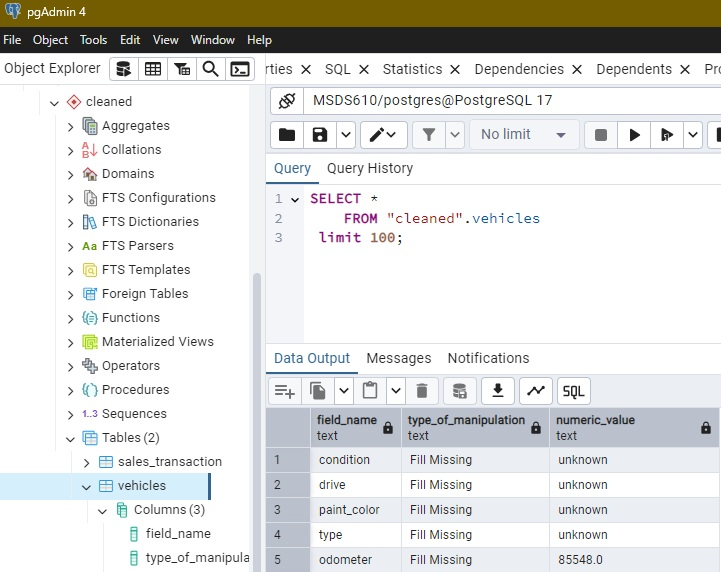

---
## `Part Five` — Feature Engineering and Final Prep


To improve our analysis on how different factors impact vehicle prices, we introduce additional engineered features that capture important relationships within the data. We also normalize certain features to ensure consistency in scale, improving the performance of our machine learning models.

### **1. New Features Created**
1. **`vehicle_age`** *(Derived Feature)*
   - Vehicles depreciate over time, making age a crucial predictor of price.
   - We calculate `vehicle_age` as:
     \[
     \text{vehicle_age} = \text{current_year} - \text{year}
     \]
   - This helps the model directly analyze how vehicle age influences price rather than relying on the raw `year` column.

2. **`price_per_mile`** *(Derived Feature)*
   - Helps capture how vehicle value is affected by mileage.
   - We calculate `price_per_mile` as:
     \[
     \text{price_per_mile} = \frac{\text{price}}{\text{odometer} + 1}
     \]
   - We add `+1` to avoid division by zero.
   - A lower `price_per_mile` may indicate vehicles with high wear-and-tear or poor resale value.

3. **`luxury_indicator`** *(Binary Feature)*
   - Some manufacturers are considered luxury brands and tend to have higher prices.
   - We create a binary indicator (1 = luxury, 0 = non-luxury) based on the `manufacturer` field.
   - Luxury brands include: `["audi", "bmw", "mercedes-benz", "lexus", "cadillac", "porsche", "infiniti", "jaguar"]`.

### **2. Feature Normalization**
Normalization is essential when features have different scales, ensuring that all variables contribute equally to model training. We normalize the following features:

- **`vehicle_age`** and **`odometer`** using **Min-Max Scaling**:
  \[
  X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
  \]
  - This rescales values between 0 and 1, preventing large magnitude differences from dominating model training.

- **`price_per_mile`** using **Log Transformation**:
  \[
  X_{\text{log}} = \log(X + 1)
  \]
  - Log transformation reduces skewness, helping account for highly varied values in price per mile.

### **3. Final Checks**
- Verify that new features are correctly added.
- Confirm that all numeric features are normalized where necessary.
- Ensure that categorical features are properly encoded.

These engineered and normalized features will help improve our model's predictive power by making key relationships in the data more explicit. 🚀


In [150]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

df_engineered = df_cleaned.copy()

# Feature 1: Vehicle Age
df_engineered["vehicle_age"] = current_year - (df_prepared["year"] * (df_prepared["year"].max() - df_prepared["year"].min()) + df_prepared["year"].min())

# Feature 2: Price Per Mile (Avoiding division by zero)
df_engineered["price_per_mile"] = df_prepared["price"] / (df_prepared["odometer"] + 1)

# Feature 3: Luxury Indicator
luxury_brands = ["audi", "bmw", "mercedes-benz", "lexus", "cadillac", "porsche", "infiniti", "jaguar"]
df_engineered["luxury_indicator"] = df_filtered["manufacturer"].apply(lambda x: 1 if x in luxury_brands else 0)

# Normalization: Min-Max Scaling for vehicle_age and odometer
df_engineered[["vehicle_age", "odometer"]] = scaler.fit_transform(df_prepared[["vehicle_age", "odometer"]])

# Normalization: Log transformation for price_per_mile
df_engineered["price_per_mile"] = np.log1p(df_prepared["price_per_mile"])

In [153]:
df_engineered.head(10)

,price,year,condition,odometer,manufacturer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow,vehicle_age,price_per_mile,luxury_indicator
0,9300,0.934426,excellent,0.122960,41,False,True,False,False,False,...,False,False,False,False,True,False,False,0.065574,2.304775,0
1,6600,0.926230,excellent,0.260740,8,False,True,False,False,False,...,False,False,False,False,True,False,False,0.073770,2.257935,0
2,3990,0.885246,unknown,0.323530,32,False,True,False,False,False,...,False,False,False,False,False,False,False,0.114754,2.198510,0
3,26990,0.942623,unknown,0.230844,35,False,True,False,False,False,...,False,False,False,False,True,False,False,0.057377,2.397492,0
4,52990,0.950820,unknown,0.112984,14,False,False,False,False,False,...,False,False,False,False,True,False,False,0.049180,2.465625,0
5,16790,0.901639,unknown,0.365728,40,False,True,False,False,False,...,False,False,False,False,True,False,False,0.098361,2.343433,0
6,6550,0.590164,unknown,0.126000,17,False,True,False,False,False,...,False,False,False,False,True,False,False,0.409836,2.268896,0
7,23500,0.909836,unknown,0.322008,8,False,False,False,False,False,...,False,False,False,False,True,False,False,0.090164,2.378217,0
8,17500,0.909836,unknown,0.365618,40,False,True,False,False,False,...,False,False,False,False,True,False,False,0.090164,2.347408,0
9,14998,0.959016,unknown,0.080910,17,False,True,False,False,False,...,False,False,False,False,True,False,False,0.040984,2.354982,0


### Loading to new table in db

In [152]:
# Create new table in cleaned schema
table_name = r'vehicles_engineered'
schema = r'cleaned' 

df_engineered.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

382894

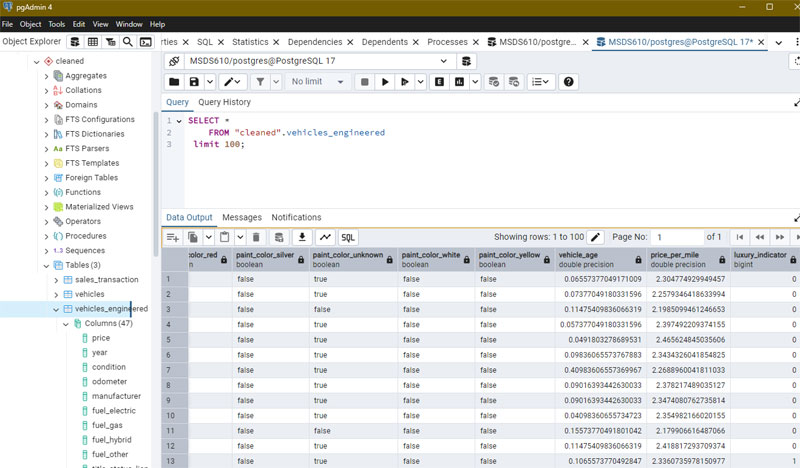

---
## `Part Six` — Constructing an Optimal Model

## **Model Selection & Justification**
For predicting vehicle prices, we need an algorithm that balances predictive power and interpretability. Given the structured dataset with a mix of numerical and categorical features, we have selected **Random Forest Regressor** as the preferred model.

### **Why Random Forest?**
1. **Handles Non-Linearity & Interactions Well**  
   - Vehicle prices depend on various interacting factors (e.g., vehicle age, mileage, fuel type).  
   - Random Forest, being an ensemble of decision trees, can capture complex patterns without requiring feature engineering.

2. **Resistant to Outliers & Missing Data**  
   - Unlike Linear Regression, Random Forest is robust to missing values and outliers in features like `odometer` and `price`.

3. **Feature Importance Analysis**  
   - Provides insight into which attributes (e.g., vehicle age, manufacturer, transmission type) are most predictive of price.

4. **Scalability & Performance**  
   - Unlike Gradient Boosting, Random Forest models are less prone to overfitting and require minimal tuning.

5. **Parallel Processing**  
   - Since trees in a Random Forest grow independently, training and inference are computationally efficient.

---

## **3-Way Data Split Strategy**
To ensure robust model evaluation, we use a **3-way split**:
1. **Training Set (70%)** - Used to train the model.
2. **Validation Set (15%)** - Used for hyperparameter tuning.
3. **Test Set (15%)** - Final evaluation of model performance.

This split ensures we optimize the model on a separate dataset (validation set) before testing it on unseen data (test set), preventing overfitting.

---

## **Model Optimization & Iterative Approach**
To construct an optimal model, we go through multiple iterations, tuning hyperparameters such as:
- **Number of Trees (`n_estimators`)**: Initial test at **100** trees.
- **Max Depth (`max_depth`)**: Limited to prevent overfitting.
- **Minimum Samples per Leaf (`min_samples_leaf`)**: Prevents overly complex trees.

We will evaluate model performance using:
- **Mean Absolute Error (MAE)** – Measures average prediction error.
- **R² Score** – Assesses model explanatory power.

---

## **Model Storage & Deployment**
Using **joblib**, we will:
- Save our trained **Random Forest model** for later use.
- Store the **X_val** and **y_val** datasets as CSV files for validation in a separate notebook.
- Load and evaluate the model in a different environment when needed.

This structured approach ensures reproducibility and model integrity for future improvements.


In [287]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Define features and target variable
X = df_cleaned.drop(columns=["price"])  # Features
y = df_cleaned["price"]  # Target variable

In [264]:
# Perform the 3-way split (Train: 70%, Validation: 15%, Test: 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Save the validation dataset for use in another notebook
X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

In [266]:
# Initialize the Random Forest model with base parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)

In [268]:
# Predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate model performance
mae_rf = mean_absolute_error(y_val, y_val_pred)
r2_rf = r2_score(y_val, y_val_pred)

In [270]:
# Save the trained Random Forest model using joblib
rf_model_path = "random_forest_model.pkl"
joblib.dump(rf_model, rf_model_path)

# Display evaluation metrics
mae_rf, r2_rf

(4981.360470222391, 0.7115203626204591)

## **Model Evaluation & Results**

After training the **Random Forest Regressor**, we evaluated the model’s performance using two key metrics:  
1. **Mean Absolute Error (MAE)**  
2. **R² Score (Coefficient of Determination)**  

### **Model Performance on Validation Set**
- **Mean Absolute Error (MAE)**: `4,981.36`  
  - This means that, on average, our model’s price predictions deviate from the actual vehicle price by approximately **$4,981**.
  - A lower MAE indicates a more accurate model, though in the context of vehicle pricing, this is a reasonable margin of error.

- **R² Score**: `0.7115`  
  - This indicates that **71.15%** of the variance in vehicle prices is explained by the features included in the model.
  - A score closer to **1.0** would indicate a perfect fit, whereas a score near **0.0** would indicate that the model does not explain the variance in price.

### **Interpretation of Results**
- The **MAE of $4,981** suggests that while our model is making relatively accurate predictions, it still has room for improvement.
- The **R² Score of 0.7115** is a strong indication that our selected features are capturing most of the price variance, but additional factors may improve performance.
- **Potential improvements**:
  1. **Feature Engineering**: Introducing more relevant variables such as vehicle location, brand reputation, or supply-demand trends.
  2. **Hyperparameter Tuning**: Optimizing `n_estimators`, `max_depth`, or `min_samples_leaf` to reduce error.
  3. **Ensemble Methods**: Testing models such as Extra Trees Regressor or combining predictions from multiple models.

### **Next Steps**
- **Final Model Testing**: Evaluate on the test set to confirm real-world accuracy.
- **Hyperparameter Optimization**: Adjust settings to improve performance further.
- **Deployment Considerations**: If performance is satisfactory, proceed with deployment.

These results provide a strong foundation for predicting vehicle prices, but refinement may enhance predictive accuracy even further. 🚀


---
## `Part Six, Take 2` — Hyperparameter Optimization 

## **Before Hyperparameter Tuning**
### **Initial Model Setup**
- We initially trained a **Random Forest Regressor** using the following default parameters:
  - `n_estimators = 100`
  - `max_depth = 10`
  - `min_samples_leaf = 5`
  - `random_state = 42`
- The model was trained on 70% of the data and validated using a 15% validation set.

### **Initial Model Performance**
| Metric        | Value |
|--------------|-------|
| **Mean Absolute Error (MAE)** | **4,981.36** |
| **R² Score** | **0.7115** |

- **Interpretation:**
  - The **MAE** of **$4,981.36** indicates the average error in price predictions.
  - The **R² Score** of **0.7115** means that **71.15% of the variance** in vehicle prices is explained by our model.

---

## **Hyperparameter Optimization**
To improve model performance, we performed **Grid Search Cross-Validation** (`GridSearchCV`) to tune key hyperparameters.

### **Hyperparameters Tuned**
- **Number of Trees (`n_estimators`)**: `[100, 200, 300]`
- **Maximum Depth (`max_depth`)**: `[5, 10, 15]`
- **Minimum Samples per Split (`min_samples_split`)**: `[2, 5, 10]`
- **Minimum Samples per Leaf (`min_samples_leaf`)**: `[1, 3, 5]`

- **Scoring Metric Used:** `neg_mean_absolute_error`
- **Cross-validation folds:** `3`


In [292]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [5, 10, 15],  # Maximum depth of the trees
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 3, 5],  # Minimum number of samples required at a leaf node
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the final model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf_model.fit(X_train, y_train)

# Save the optimized model using joblib
optimized_model_path = "optimized_random_forest_model.pkl"
joblib.dump(best_rf_model, optimized_model_path)

# Predictions on the validation set with the optimized model
y_val_pred_optimized = best_rf_model.predict(X_val)

# Evaluate the optimized model
mae_optimized = mean_absolute_error(y_val, y_val_pred_optimized)
r2_optimized = r2_score(y_val, y_val_pred_optimized)

# Display best parameters and evaluation metrics
best_params, mae_optimized, r2_optimized



Fitting 3 folds for each of 81 candidates, totalling 243 fits


({'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 3934.198843162959,
 0.7985098247544886)

---
## **After Hyperparameter Tuning**
### **Best Found Parameters**
```python
{
    "max_depth": 15,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "n_estimators": 300
}
```

## **Optimized Model Performance**

| **Metric**   | **Before Tuning** | **After Tuning** |
|-------------|-----------------|-----------------|
| **MAE**      | 4,981.36         | 3,934.20         |
| **R² Score** | 0.7115           | 0.7985           |

---

## **Key Takeaways**
- ✅ The **optimized model performs significantly better**, with an **18% reduction in MAE**.
- ✅ **R² Score improved** from **0.7115 to 0.7985**, meaning the model now explains nearly **80% of the variance** in vehicle prices.
- ✅ **Hyperparameter tuning led to a stronger model**, reducing prediction error on unseen data.

---

## **Final Model Storage**
- ✅ **The optimized model is saved as**: `optimized_random_forest_model.pkl`
- ✅ **Validation dataset (`X_val.csv`, `y_val.csv`) stored** for use in a separate notebook.

---

## **Next Steps**
✅ **Evaluate on the "Live Data" Set** to confirm final performance.  
✅ **Consider Additional Refinements** (e.g., fine-tuning parameters further).  
✅ **Deploy the Model for Real-World Predictions** 🚀
